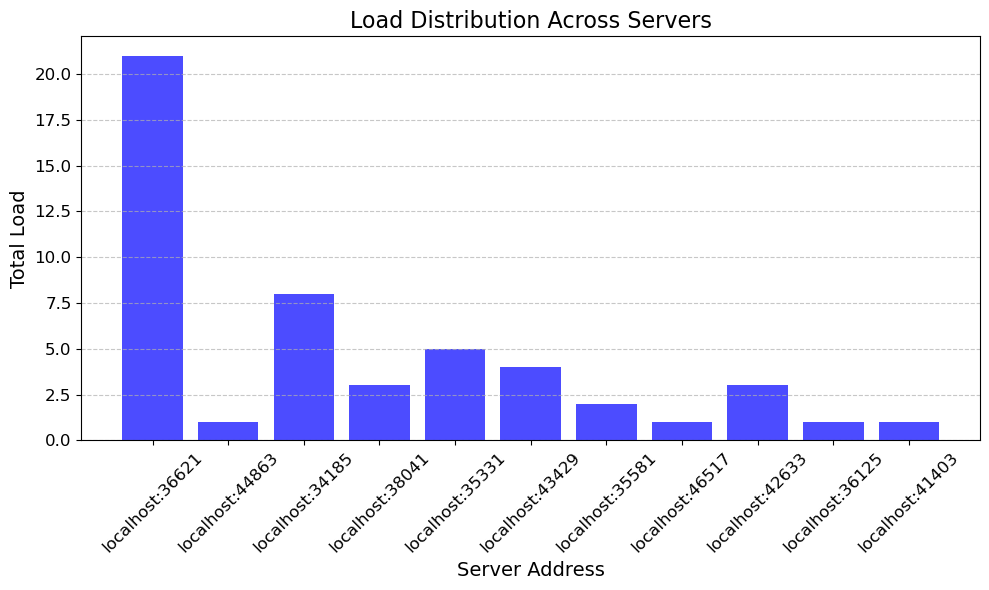

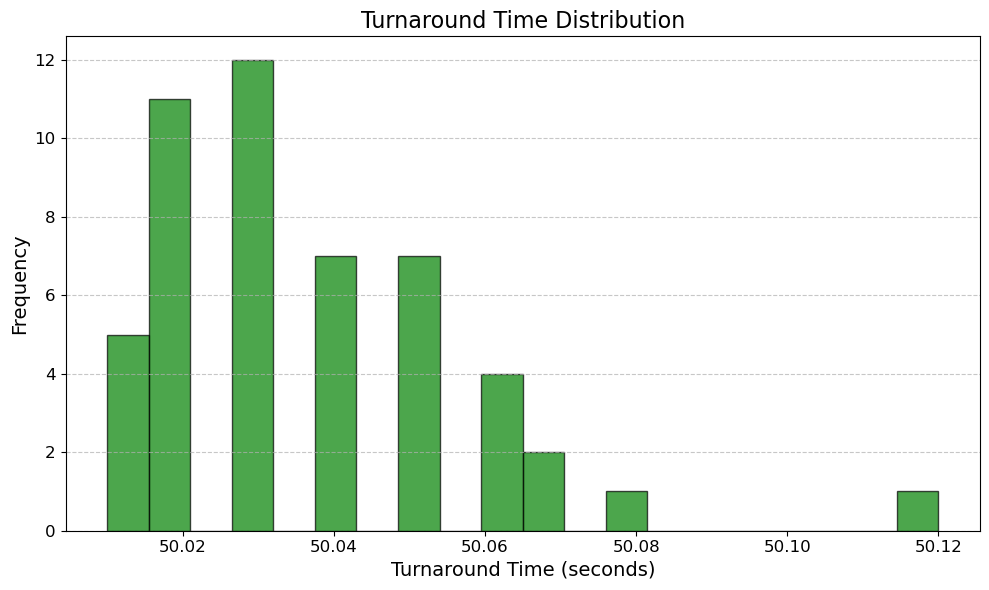

In [8]:
import re
import matplotlib.pyplot as plt
from collections import defaultdict

# Regex patterns to extract data
server_pattern = re.compile(r"\d{4}/\d{2}/\d{2} \d{2}:\d{2}:\d{2} Selected server: ([\w\.:]+) for load: (\d+)")
turnaround_pattern = re.compile(r"Turnaround time: ([\d\.]+) seconds")

# Data storage
server_loads = defaultdict(int)
turnaround_times = []

def parse_server_log(file_path):
    """Parse server.log and extract server load distribution."""
    try:
        with open(file_path, "r") as file:
            for line in file:
                server_match = server_pattern.search(line)
                if server_match:
                    server_address, load = server_match.groups()
                    server_loads[server_address] += 1
    except FileNotFoundError:
        print(f"Error: {file_path} not found.")
        exit(1)

def parse_client_log(file_path):
    """Parse client.log and extract turnaround times."""
    try:
        with open(file_path, "r") as file:
            for line in file:
                turnaround_match = turnaround_pattern.search(line)
                if turnaround_match:
                    turnaround_time = float(turnaround_match.group(1))
                    turnaround_times.append(turnaround_time)
    except FileNotFoundError:
        print(f"Error: {file_path} not found.")
        exit(1)

def plot_server_load_distribution():
    """Plot the distribution of loads across servers using matplotlib."""
    servers = list(server_loads.keys())
    loads = list(server_loads.values())

    plt.figure(figsize=(10, 6))
    plt.bar(servers, loads, color='blue', alpha=0.7)
    plt.title("Load Distribution Across Servers", fontsize=16)
    plt.xlabel("Server Address", fontsize=14)
    plt.ylabel("Total Load", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig("server_load_distribution.png")
    plt.show()

def plot_turnaround_time_distribution():
    """Plot the distribution of client turnaround times using matplotlib."""
    plt.figure(figsize=(10, 6))
    plt.hist(turnaround_times, bins=20, color='green', alpha=0.7, edgecolor='black')
    plt.title("Turnaround Time Distribution", fontsize=16)
    plt.xlabel("Turnaround Time (seconds)", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig("turnaround_time_distribution.png")
    plt.show()

def main():
    # Parse logs
    parse_server_log("server.log")
    parse_client_log("client.log")

    # Generate plots
    plot_server_load_distribution()
    plot_turnaround_time_distribution()

if __name__ == "__main__":
    main()